# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
    X_train_mean = np.mean(X_train, axis=0) # Compute the mean of the training set
    X_test_mean = np.mean(X_test, axis=0) # Compute the mean of the test set
    
    X_train_centered = X_train - X_train_mean # Center the training set
    X_test_centered = X_test - X_test_mean # Center the test set

    U_train, S_train, Vt_train = np.linalg.svd(X_train_centered, full_matrices=False) # Compute SVD for training set
    
    # keep top n_components singular values and vectors
    U_train_reduced = U_train[:, :n_components]
    S_train_reduced = np.diag(S_train[:n_components])
    Vt_train_reduced = Vt_train[:n_components, :]
    
    # Project training data to reduced dimensional space 
    X_train_reduced = np.dot(U_train_reduced, S_train_reduced) # X_train_reduced = U_train_reduced * S_train_reduced

    # Use Vt_train_reduced to transform test data and project to same space
    X_test_reduced = np.dot(X_test_centered, Vt_train_reduced.T) # X_test_reduced = X_test_centered * Vt_train_reduced.T
    
    return X_train_reduced, X_test_reduced, Vt_train_reduced 

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [10, 20, 50, 100]  # You need to decide what number to search...

# Store the results
results = []
Vt_train_reduced_last = None

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, Vt_train_reduced = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    Vt_train_reduced_last = Vt_train_reduced # for part 5

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


In [ ]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
import matplotlib.pyplot as plt

# Plot accuracy and training time as a function of the number of SVD components
def plot_results(results):
    # extract data here
    n_components = [result['n_components'] for result in results]
    accuracies = [result['accuracy'] for result in results]
    training_times = [result['training_time'] for result in results]
    
    # plot: Accuracy vs Number of SVD components
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(n_components, accuracies, marker='o', label='Accuracy')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
    # plot: Training Time vs number of SVD components
    plt.subplot(1, 2, 2)
    plt.plot(n_components, training_times, marker='o', color='orange', label='Training Time (seconds)')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# function to visualize top 5 singular vectors (reshape into 28x28 images)
def visualize_top_singular_vectors(Vt_train_reduced):
    plt.figure(figsize=(10, 2))
    for i in range(5):  # Visualize top 5 singular vectors
        singular_vector = Vt_train_reduced[i, :].reshape(28, 28)  # reshape to 28x28
        plt.subplot(1, 5, i + 1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f"Singular Vector {i+1}")
        plt.axis('off')
    
    plt.suptitle("Top 5 Singular Vectors")
    plt.show()

plot_results(results)
visualize_top_singular_vectors(Vt_train_reduced)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The trend for the graph Accurracy vs Number of SVD Components is as the number of components increases, the accurracy also increases. At 10 components, we see accurracy at 80%, 20 components at 88%, 50 components at 92%. The sharp increase in accurracy captured by the first 20-50 singular vectors show that it affects the classification task more significantly than the other intervals. Beyond 50 components, we see the marginal gain is very small. It shows that it is not as effective as the first 50 components. 

The trend for the Training Time vs Number of SVD Components is that the training time increases nearly linearly throughout the number of components. At 10 components it took 1 second, 20 components 3 seconds, 50 components 13 seconds, 100 components 44 seconds. Although the pattern is very linear, the sharp increase from 50 to 100 shows that as the more components, the more time it takes to train the model.

Conclusion is that 50 SVD components seem like the best choice where there is high accurracy and relatively low training time. It is a good trade-off between the two. Our SVD approach successfully reduced the dimensionality of the data and improved the model's performance.
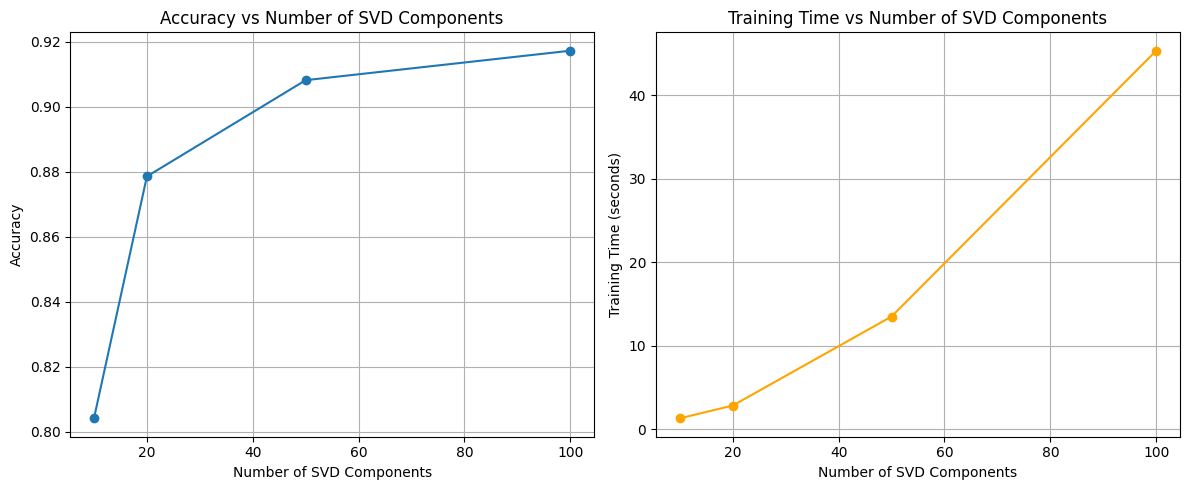
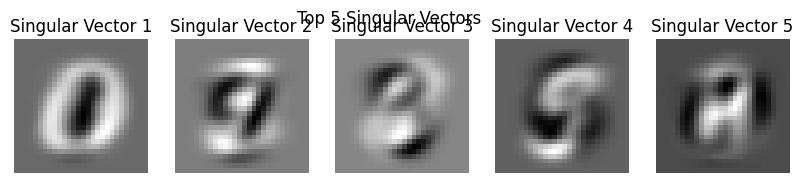